In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
pip install adjustText


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (18.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and direc

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import torch
import pickle

import os
import pandas as pd
from sklearn.cluster import KMeans

# Assuming matrix and embeddings_dict are already defined in your code



def visualize_clusters(matrix, kmeans, df_clusters):
    # Assuming n_clusters is known, if not we can infer from kmeans
    n_clusters = kmeans.n_clusters

    # 1. Use t-SNE to reduce dimensionality to 2D and visualize it
    tsne = TSNE(n_components=2, perplexity=15, random_state=423, init="pca", learning_rate=200)
    vis_dims2 = tsne.fit_transform(matrix)

    x = [x for x, y in vis_dims2]
    y = [y for x, y in vis_dims2]

    plt.figure()
    for category, color in enumerate(["purple", "green", "red", "blue","YELLOW","ORANGE","PINK","BLACK","teal","brown"]):
        xs = np.array(x)[df_clusters.Cluster == category]
        ys = np.array(y)[df_clusters.Cluster == category]
        plt.scatter(xs, ys, color=color, alpha=0.3)

        # Mark the centroid of each cluster
        avg_x = xs.mean()
        avg_y = ys.mean()
        plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)

    plt.title("Clusters of ingredients visualized in 2D using t-SNE")
    plt.show()

    # 2. Calculate the distances of each data point to the cluster centers and plot the magnitudes
    distances = kmeans.transform(matrix)
    own_cluster_distances = np.choose(kmeans.labels_, distances.T)

    magnitudes = []
    for cluster_id in range(n_clusters):
        magnitude = own_cluster_distances[kmeans.labels_ == cluster_id].sum()
        magnitudes.append(magnitude)

    plt.figure()
    plt.bar(range(n_clusters), magnitudes, color='skyblue', edgecolor='black')
    plt.title('Cluster Magnitudes')
    plt.xlabel('Cluster ID')
    plt.ylabel('Magnitude (Sum of Distances to Centroid)')
    plt.xticks(range(n_clusters))
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # 3. Calculate the cardinality of each cluster and plot
    cardinality = df_clusters.groupby('Cluster').size()
    print("Cluster Cardinality:")
    print(cardinality)

    plt.figure()
    df_clusters['Cluster'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Cluster Cardinality')
    plt.xlabel('Cluster ID')
    plt.ylabel('Number of Ingredients')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

    # 4. Plot Magnitude vs. Cardinality
    plt.figure(figsize=(10, 6))
    cardinalities = cardinality.tolist()
    plt.scatter(cardinalities, magnitudes, color='skyblue', edgecolor='black', s=100)

    min_value = min(min(cardinalities), min(magnitudes))
    max_value = max(max(cardinalities), max(magnitudes))
    plt.plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--')

    for i, cluster_id in enumerate(range(n_clusters)):
        plt.annotate(f"Cluster {cluster_id}", (cardinalities[i], magnitudes[i]), fontsize=10, ha='right')

    plt.title('Magnitude vs. Cardinality')
    plt.xlabel('Cardinality')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.tight_layout()
    plt.show()




In [ ]:
def determine_optimal_clusters(data, max_clusters):
    wcss = []  # Within-cluster sum of squares

    for i in range(1, max_clusters+1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plotting the elbow method graph
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()




MULTILIGUAL BERT ENGLISH

In [ ]:
with open('/content/drive/MyDrive/MyEmbeddings/bert-base-multilingual-uncased_EN_embeddings.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)



In [ ]:
import time

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

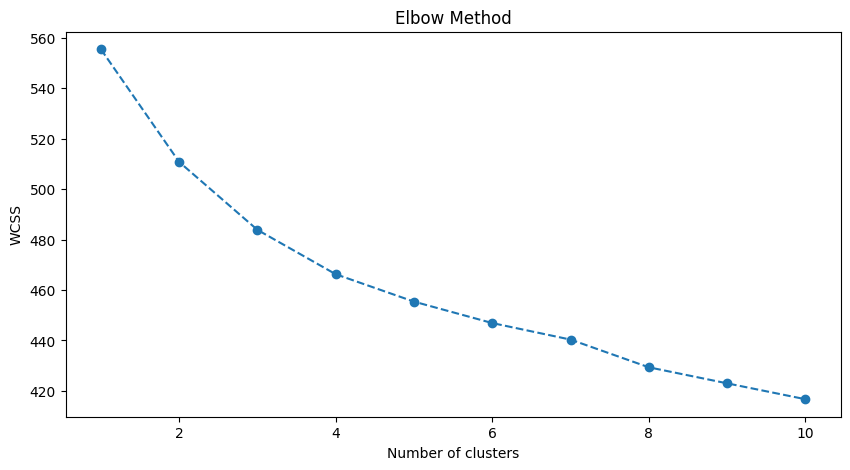

Enter the optimal number of clusters from the plot: 7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            Ingredient  Cluster
0    buckwheat noodles        4
1              lettuce        5
2        fresh oysters        5
3           Jjapagetti        3
4         cheongukjang        0
..                 ...      ...
430        peppercorns        1
431             minari        3
432    sweet red beans        1
433        flank steak        4
434        green beans        1

[435 rows x 2 columns]


In [ ]:
matrix = np.array(list(embeddings_dict.values()))
# Determine optimal clusters (in this example we're checking for up to 10 clusters)
determine_optimal_clusters(matrix, 10)

# Once you've determined the optimal number of clusters from the plot,
# set n_clusters to that value, and proceed with your original code
time.sleep(2)
n_clusters = int(input("Enter the optimal number of clusters from the plot: "))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)

# Assign cluster labels to ingredients
clusters = kmeans.labels_
ingredients = list(embeddings_dict.keys())

# Create a DataFrame for easier visualization
df_clusters = pd.DataFrame({
    'Ingredient': ingredients,
    'Cluster': clusters
})

print(df_clusters)

<ipython-input-6-6bef499625b4>:35: RuntimeWarning: Mean of empty slice.
  avg_x = xs.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-6-6bef499625b4>:36: RuntimeWarning: Mean of empty slice.
  avg_y = ys.mean()


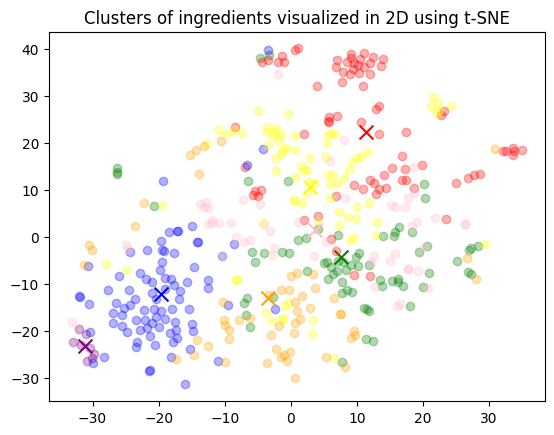

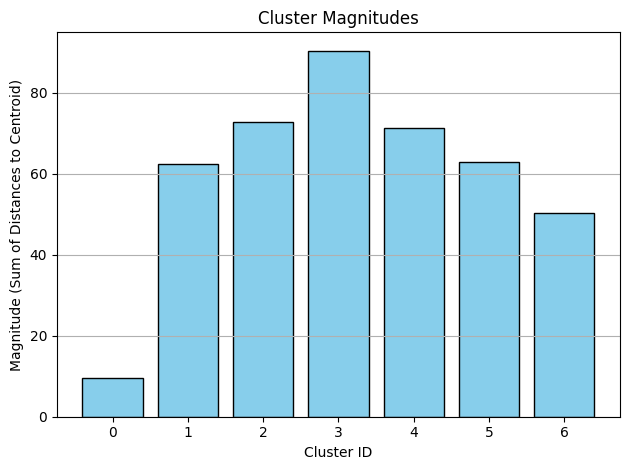

Cluster Cardinality:
Cluster
0     8
1    71
2    80
3    86
4    82
5    56
6    52
dtype: int64


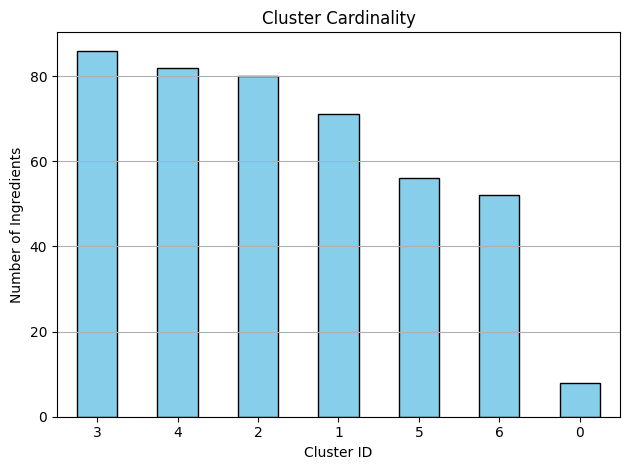

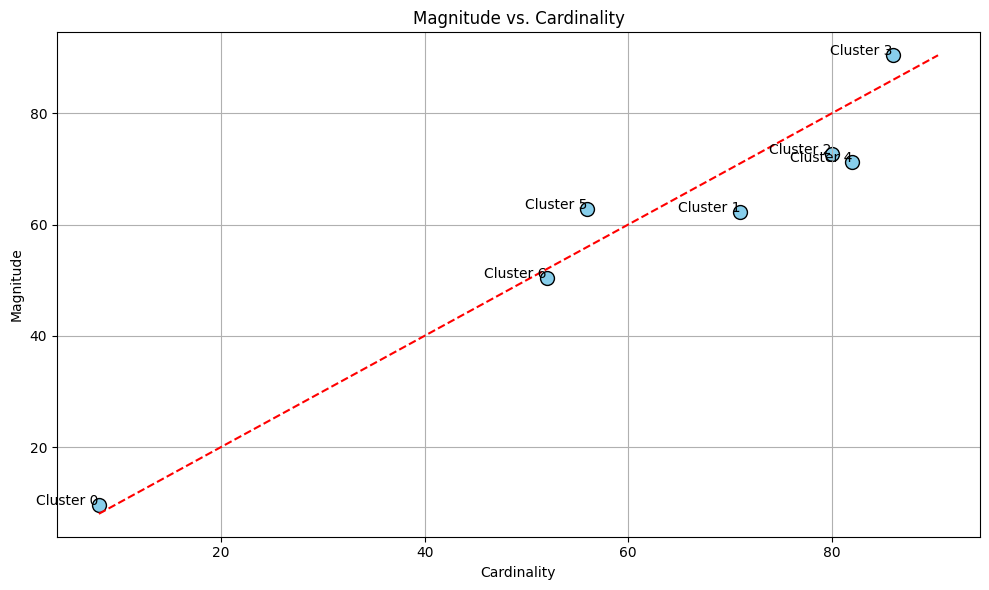

In [ ]:
# 이 코드는 바로 위꺼 후에 실행시켜야함
visualize_clusters(matrix, kmeans, df_clusters)

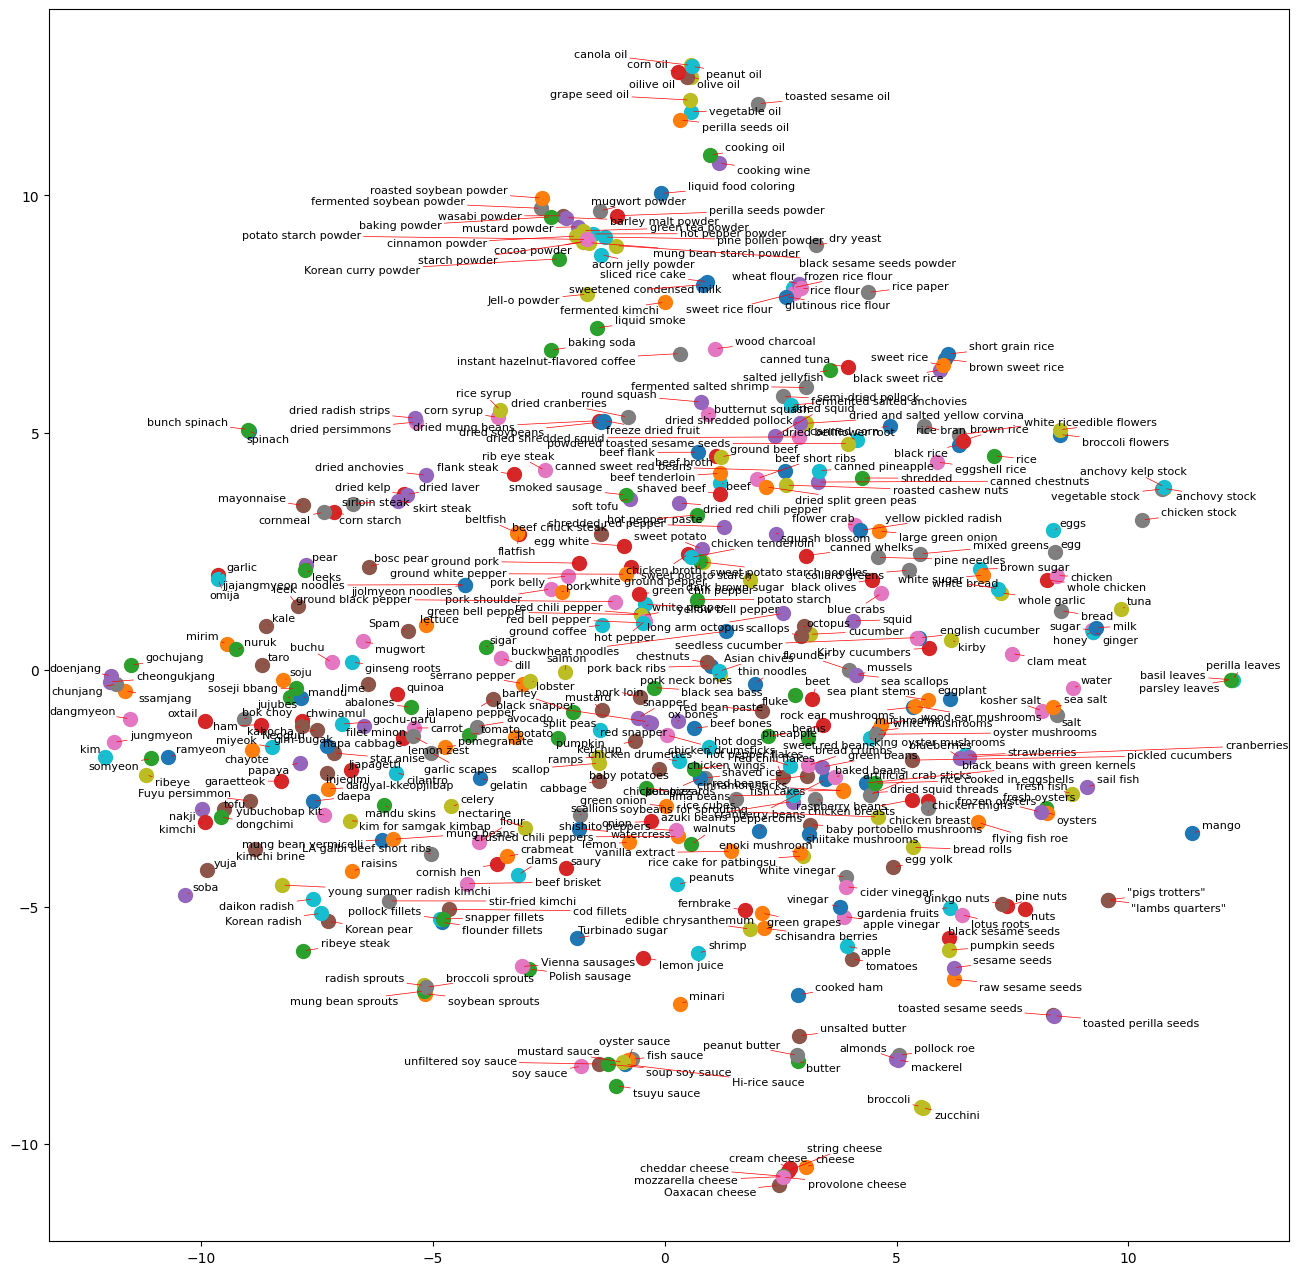

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from adjustText import adjust_text

import torch
# Using a list comprehension to gather all valid embeddings
embeddings_list = [embedding for embedding in embeddings_dict.values() if isinstance(embedding, (torch.Tensor, np.ndarray))]
# Convert all torch tensors to numpy arrays (if any)
#embeddings_array = np.vstack([embedding.numpy() if isinstance(embedding, torch.Tensor) else embedding for embedding in embeddings_list])
embeddings_array = np.vstack(list(embeddings_dict.values()))


labels = list(embeddings_dict.keys())
tsne_model = TSNE(perplexity=30, n_components=2, init="pca", n_iter=300, random_state=23)
new_values = tsne_model.fit_transform(embeddings_array)

plt.figure(figsize=(16, 16))
texts = []  # store labels here
for i in range(len(new_values)):
    plt.scatter(new_values[i][0], new_values[i][1], s = 100)
    texts.append(plt.text(new_values[i][0], new_values[i][1], labels[i], ha='center',fontsize = 8))

adjust_text(texts,
            expand_points=(1.5, 1.5),
            expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='red', lw=0.5))



plt.show()


FOODBERT ENGLISH

In [ ]:
import pickle
with open('/content/drive/MyDrive/MyEmbeddings/foodbert_EN_embeddings.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

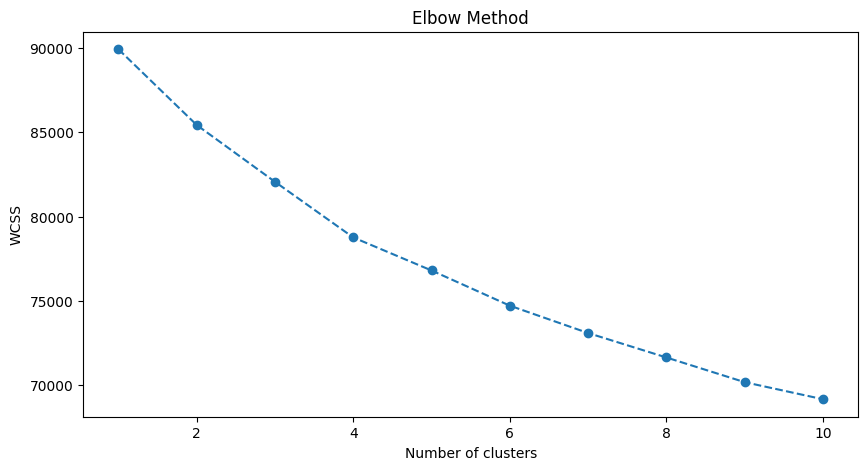

Enter the optimal number of clusters from the plot: 7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


            Ingredient  Cluster
0    buckwheat noodles        3
1              lettuce        4
2        fresh oysters        2
3           Jjapagetti        0
4         cheongukjang        6
..                 ...      ...
430        peppercorns        1
431             minari        0
432    sweet red beans        1
433        flank steak        5
434        green beans        3

[435 rows x 2 columns]


In [ ]:

import time
matrix = np.array(list(embeddings_dict.values()))
# Determine optimal clusters (in this example we're checking for up to 10 clusters)
determine_optimal_clusters(matrix, 10)

# Once you've determined the optimal number of clusters from the plot,
# set n_clusters to that value, and proceed with your original code
time.sleep(2)
n_clusters = int(input("Enter the optimal number of clusters from the plot: "))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)

# Assign cluster labels to ingredients
clusters = kmeans.labels_
ingredients = list(embeddings_dict.keys())

# Create a DataFrame for easier visualization
df_clusters = pd.DataFrame({
    'Ingredient': ingredients,
    'Cluster': clusters
})

print(df_clusters)

<ipython-input-6-6bef499625b4>:35: RuntimeWarning: Mean of empty slice.
  avg_x = xs.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-6-6bef499625b4>:36: RuntimeWarning: Mean of empty slice.
  avg_y = ys.mean()


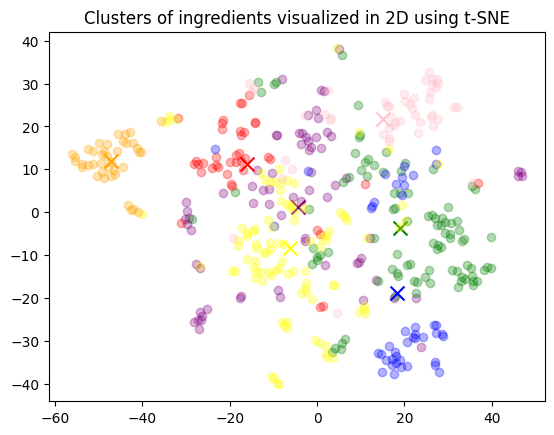

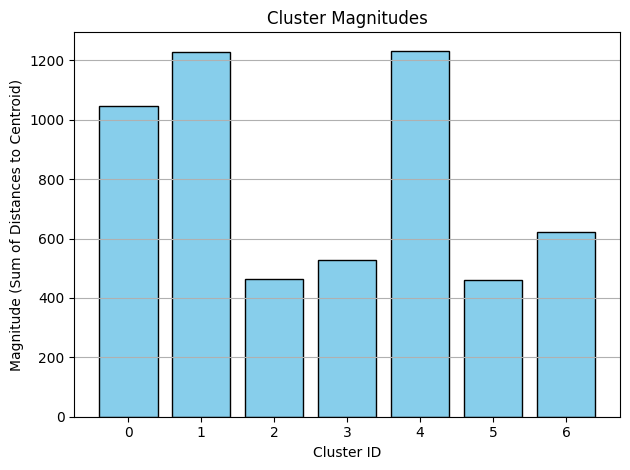

Cluster Cardinality:
Cluster
0    71
1    94
2    40
3    44
4    99
5    39
6    48
dtype: int64


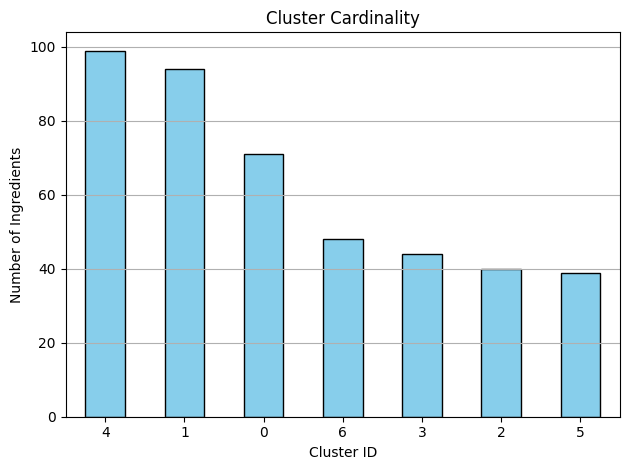

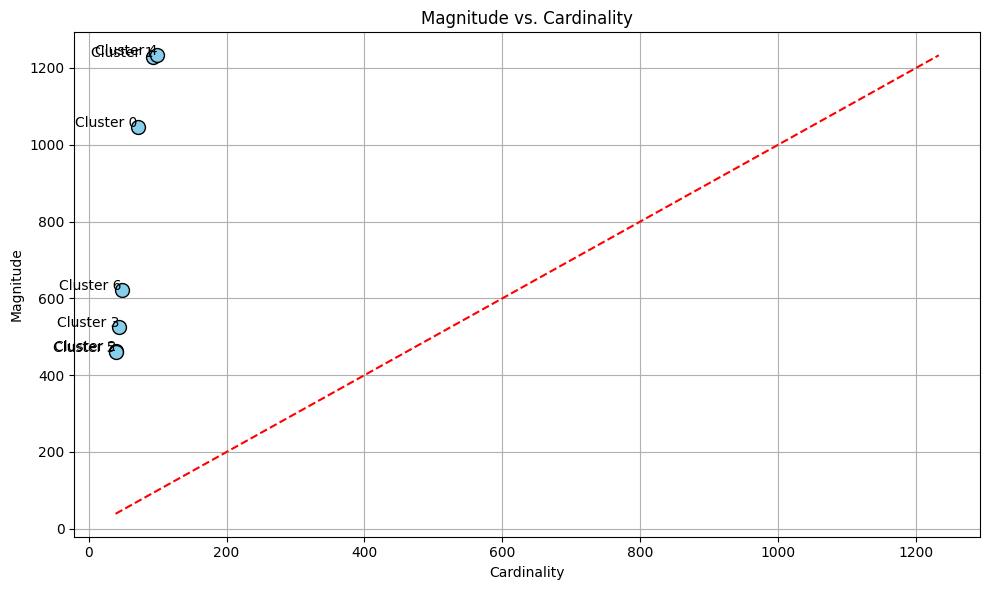

In [ ]:
# 이 코드는 바로 위꺼 후에 실행시켜야함
visualize_clusters(matrix, kmeans, df_clusters)

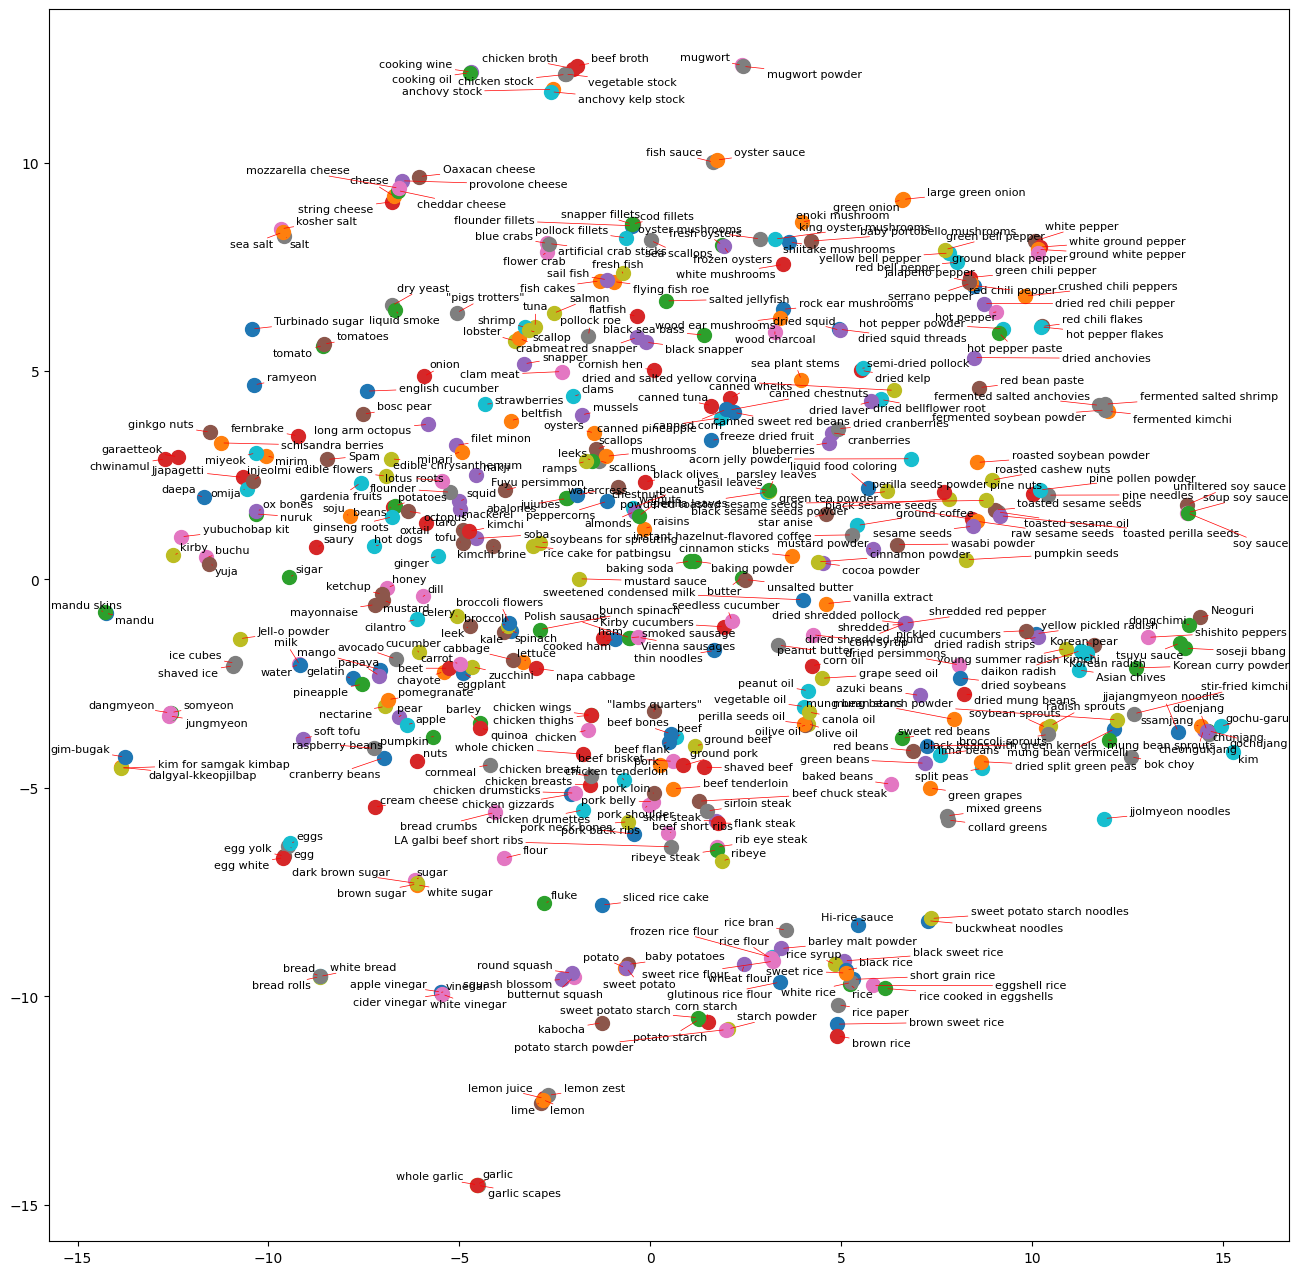

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from adjustText import adjust_text

import torch
# Using a list comprehension to gather all valid embeddings
embeddings_list = [embedding for embedding in embeddings_dict.values() if isinstance(embedding, (torch.Tensor, np.ndarray))]
# Convert all torch tensors to numpy arrays (if any)
#embeddings_array = np.vstack([embedding.numpy() if isinstance(embedding, torch.Tensor) else embedding for embedding in embeddings_list])
embeddings_array = np.vstack(list(embeddings_dict.values()))


labels = list(embeddings_dict.keys())
tsne_model = TSNE(perplexity=30, n_components=2, init="pca", n_iter=300, random_state=23)
new_values = tsne_model.fit_transform(embeddings_array)

plt.figure(figsize=(16, 16))
texts = []  # store labels here
for i in range(len(new_values)):
    plt.scatter(new_values[i][0], new_values[i][1], s = 100)
    texts.append(plt.text(new_values[i][0], new_values[i][1], labels[i], ha='center',fontsize = 8))

adjust_text(texts,
            expand_points=(1.5, 1.5),
            expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='red', lw=0.5))



plt.show()



MULTILIGUAL BERT KOREAN

In [ ]:
import pickle
with open('/content/drive/MyDrive/MyEmbeddings/bert-base-multilingual-uncased_KOR_embeddings.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

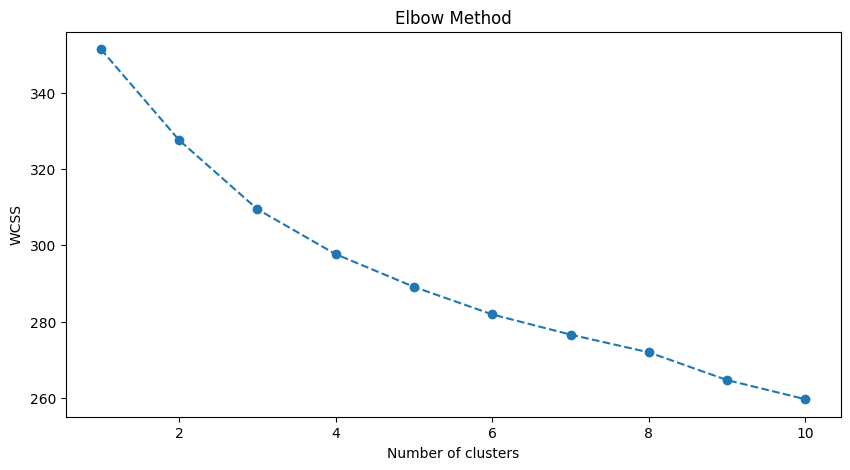

Enter the optimal number of clusters from the plot: 7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    Ingredient  Cluster
0        다진풋고추        1
1         동치미무        2
2        다진 마늘        5
3          홍피망        3
4          우동면        3
..         ...      ...
306       마른고추        1
307        메주콩        0
308         달걀        1
309        흑설탕        1
310        파뿌리        5

[311 rows x 2 columns]


In [ ]:

import time
matrix = np.array(list(embeddings_dict.values()))
# Determine optimal clusters (in this example we're checking for up to 10 clusters)
determine_optimal_clusters(matrix, 10)

# Once you've determined the optimal number of clusters from the plot,
# set n_clusters to that value, and proceed with your original code
time.sleep(2)
n_clusters = int(input("Enter the optimal number of clusters from the plot: "))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)

# Assign cluster labels to ingredients
clusters = kmeans.labels_
ingredients = list(embeddings_dict.keys())

# Create a DataFrame for easier visualization
df_clusters = pd.DataFrame({
    'Ingredient': ingredients,
    'Cluster': clusters
})

print(df_clusters)

<ipython-input-2-6bef499625b4>:35: RuntimeWarning: Mean of empty slice.
  avg_x = xs.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-2-6bef499625b4>:36: RuntimeWarning: Mean of empty slice.
  avg_y = ys.mean()


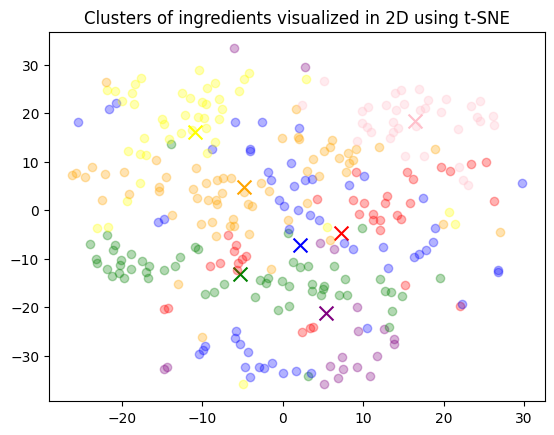

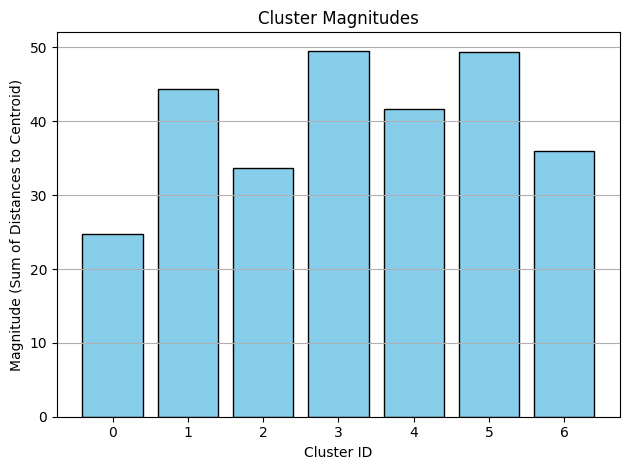

Cluster Cardinality:
Cluster
0    19
1    57
2    37
3    55
4    44
5    63
6    36
dtype: int64


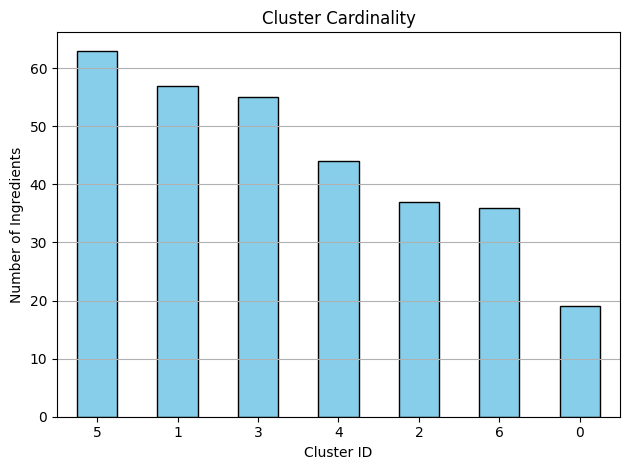

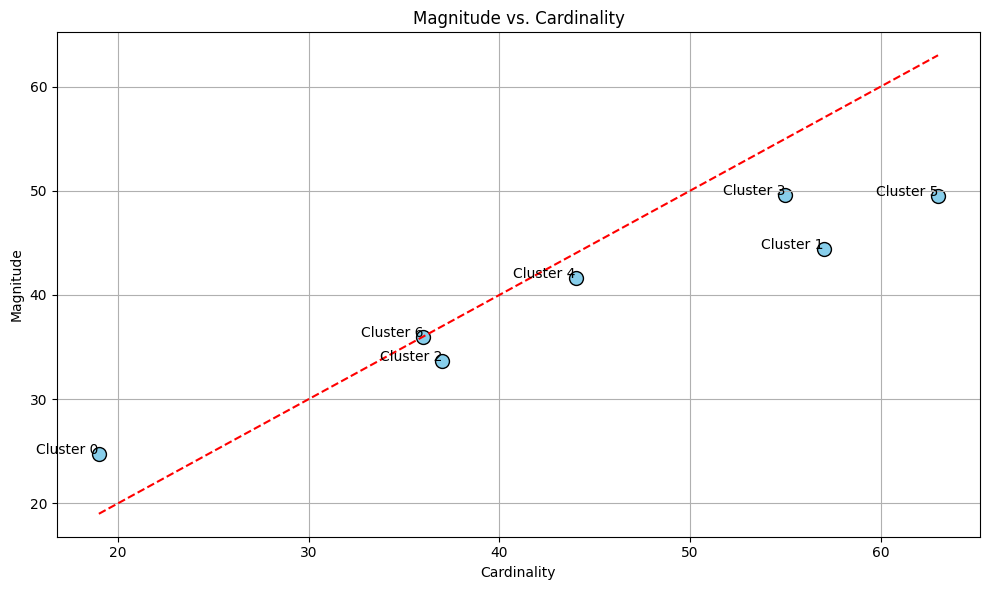

In [ ]:
# 이 코드는 바로 위꺼 후에 실행시켜야함
visualize_clusters(matrix, kmeans, df_clusters)

In [ ]:
plt.rc('font', family='NanumBarunGothic')

/usr/local/lib/python3.10/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


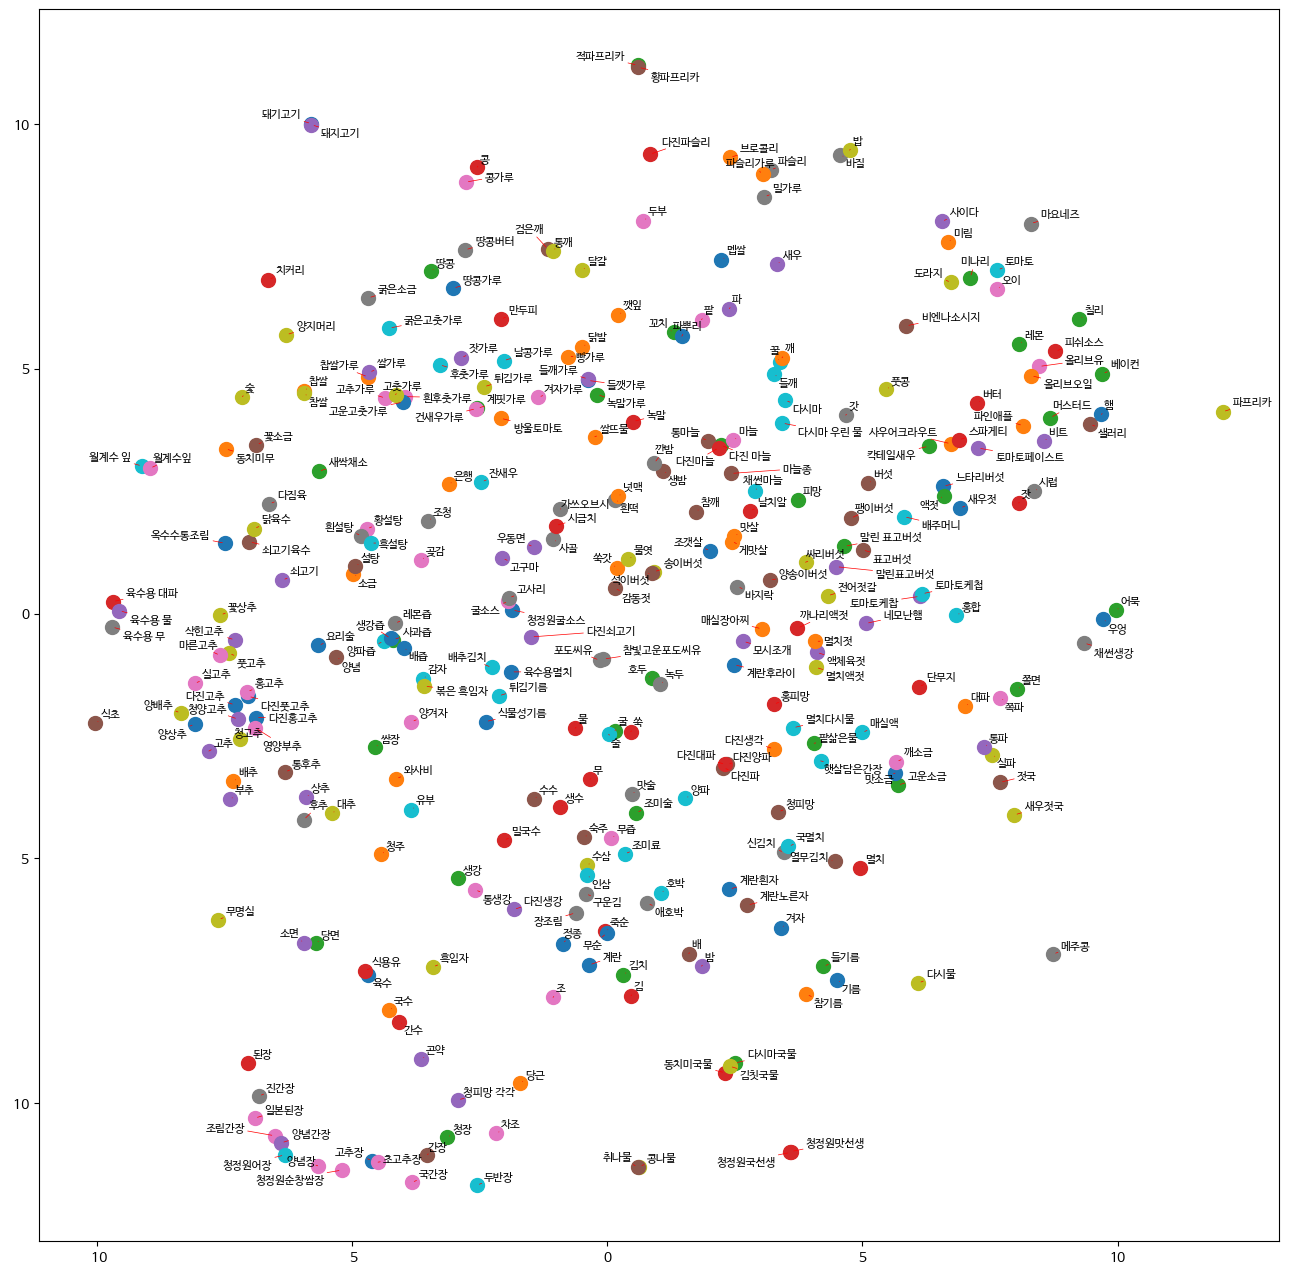

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from adjustText import adjust_text

import torch
# Using a list comprehension to gather all valid embeddings
embeddings_list = [embedding for embedding in embeddings_dict.values() if isinstance(embedding, (torch.Tensor, np.ndarray))]
# Convert all torch tensors to numpy arrays (if any)
#embeddings_array = np.vstack([embedding.numpy() if isinstance(embedding, torch.Tensor) else embedding for embedding in embeddings_list])
embeddings_array = np.vstack(list(embeddings_dict.values()))


labels = list(embeddings_dict.keys())
tsne_model = TSNE(perplexity=30, n_components=2, init="pca", n_iter=300, random_state=23)
new_values = tsne_model.fit_transform(embeddings_array)

plt.figure(figsize=(16, 16))
texts = []  # store labels here
for i in range(len(new_values)):
    plt.scatter(new_values[i][0], new_values[i][1], s = 100)
    texts.append(plt.text(new_values[i][0], new_values[i][1], labels[i], ha='center',fontsize = 8))

adjust_text(texts,
            expand_points=(1.5, 1.5),
            expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='red', lw=0.5))



plt.show()


FOODBERT - KOREAN

In [ ]:
import pickle
with open('/content/drive/MyDrive/MyEmbeddings/foodbert_KOR_embeddings.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-3-56e86bf70ba6>:6: ConvergenceWarning: Number of dist

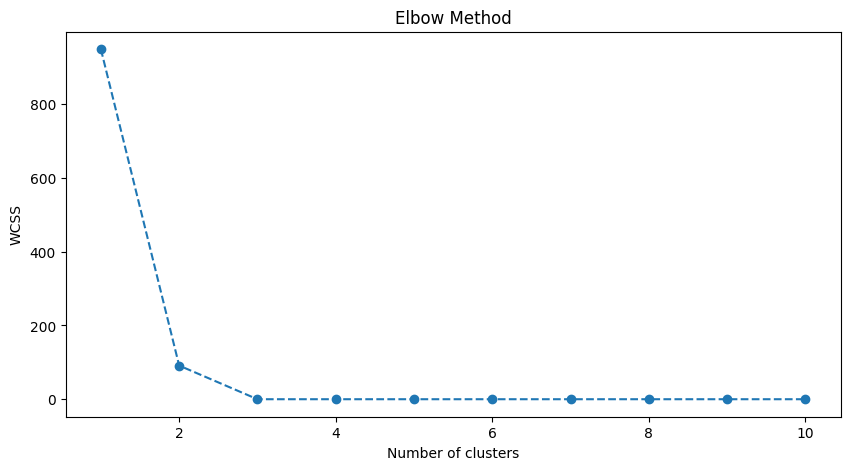

Enter the optimal number of clusters from the plot: 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


    Ingredient  Cluster
0        다진풋고추        0
1         동치미무        0
2        다진 마늘        1
3          홍피망        0
4          우동면        0
..         ...      ...
306       마른고추        0
307        메주콩        0
308         달걀        0
309        흑설탕        0
310        파뿌리        0

[311 rows x 2 columns]


In [ ]:

import time
matrix = np.array(list(embeddings_dict.values()))
# Determine optimal clusters (in this example we're checking for up to 10 clusters)
determine_optimal_clusters(matrix, 10)

# Once you've determined the optimal number of clusters from the plot,
# set n_clusters to that value, and proceed with your original code
time.sleep(2)
n_clusters = int(input("Enter the optimal number of clusters from the plot: "))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)

# Assign cluster labels to ingredients
clusters = kmeans.labels_
ingredients = list(embeddings_dict.keys())

# Create a DataFrame for easier visualization
df_clusters = pd.DataFrame({
    'Ingredient': ingredients,
    'Cluster': clusters
})

print(df_clusters)

<ipython-input-2-6bef499625b4>:35: RuntimeWarning: Mean of empty slice.
  avg_x = xs.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-2-6bef499625b4>:36: RuntimeWarning: Mean of empty slice.
  avg_y = ys.mean()


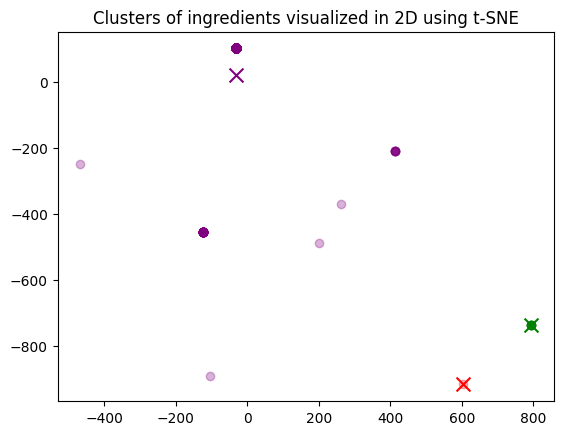

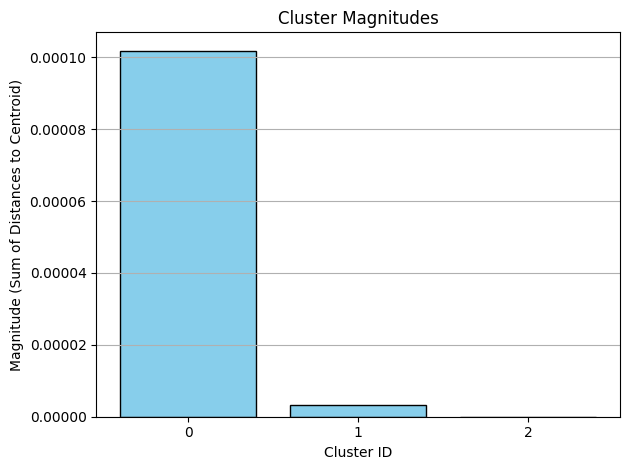

Cluster Cardinality:
Cluster
0    302
1      8
2      1
dtype: int64


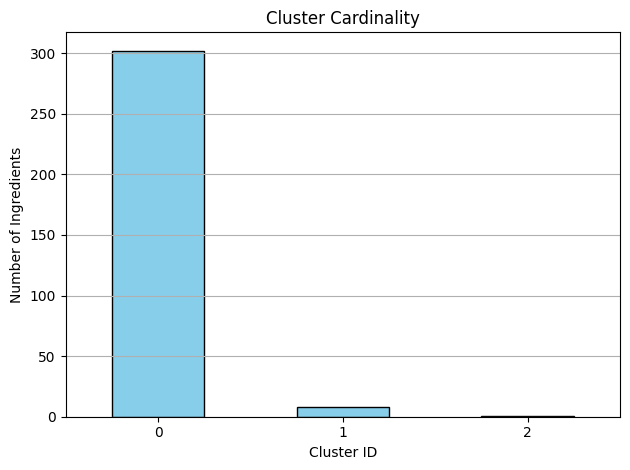

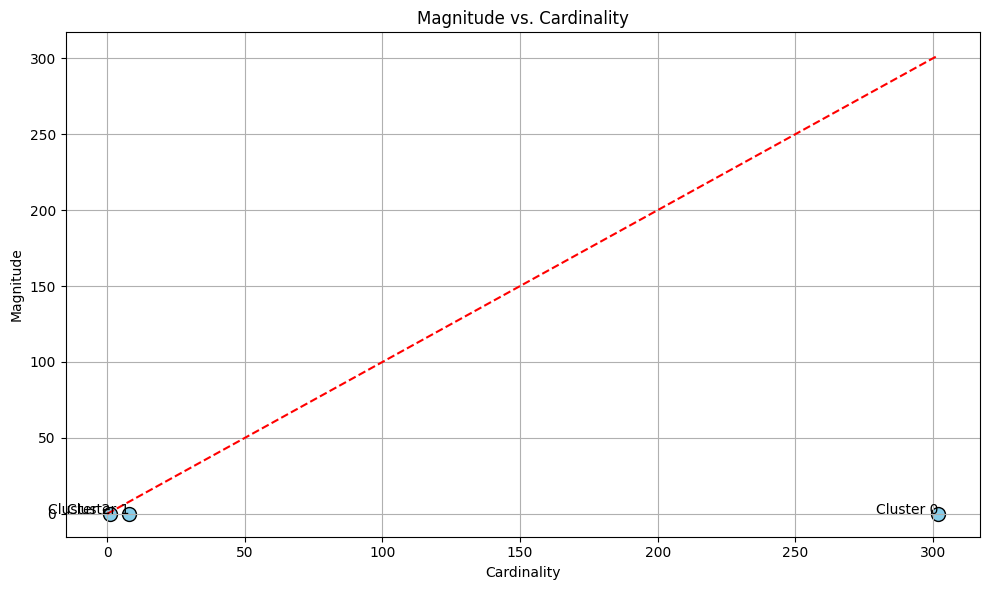

In [ ]:
# 이 코드는 바로 위꺼 후에 실행시켜야함
visualize_clusters(matrix, kmeans, df_clusters)

/usr/local/lib/python3.10/dist-packages/adjustText/__init__.py:564: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


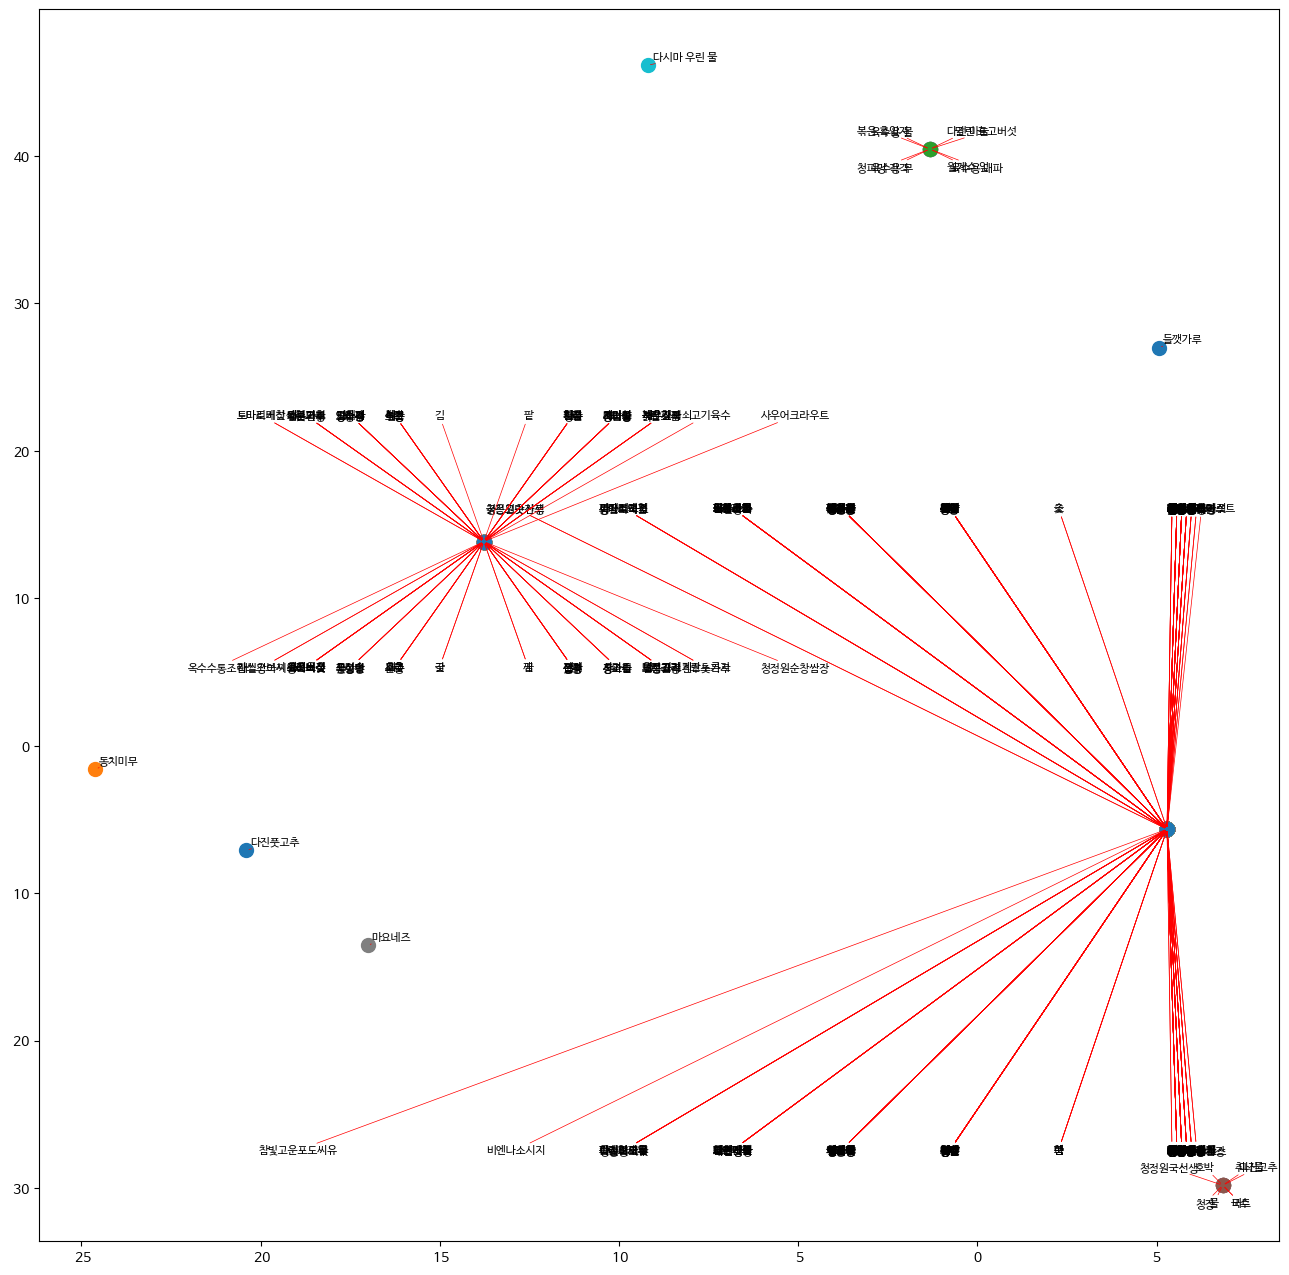

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from adjustText import adjust_text

import torch
# Using a list comprehension to gather all valid embeddings
embeddings_list = [embedding for embedding in embeddings_dict.values() if isinstance(embedding, (torch.Tensor, np.ndarray))]
# Convert all torch tensors to numpy arrays (if any)
#embeddings_array = np.vstack([embedding.numpy() if isinstance(embedding, torch.Tensor) else embedding for embedding in embeddings_list])
embeddings_array = np.vstack(list(embeddings_dict.values()))


labels = list(embeddings_dict.keys())
tsne_model = TSNE(perplexity=30, n_components=2, init="pca", n_iter=300, random_state=23)
new_values = tsne_model.fit_transform(embeddings_array)

plt.figure(figsize=(16, 16))
texts = []  # store labels here
for i in range(len(new_values)):
    plt.scatter(new_values[i][0], new_values[i][1], s = 100)
    texts.append(plt.text(new_values[i][0], new_values[i][1], labels[i], ha='center',fontsize = 8))

adjust_text(texts,
            expand_points=(1.5, 1.5),
            expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='red', lw=0.5))



plt.show()


bert base MULTILINGUAL RUSSIAN

In [ ]:
import pickle
with open('/content/drive/MyDrive/MyEmbeddings/bert-base-multilingual-uncased_RUS_embeddings.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

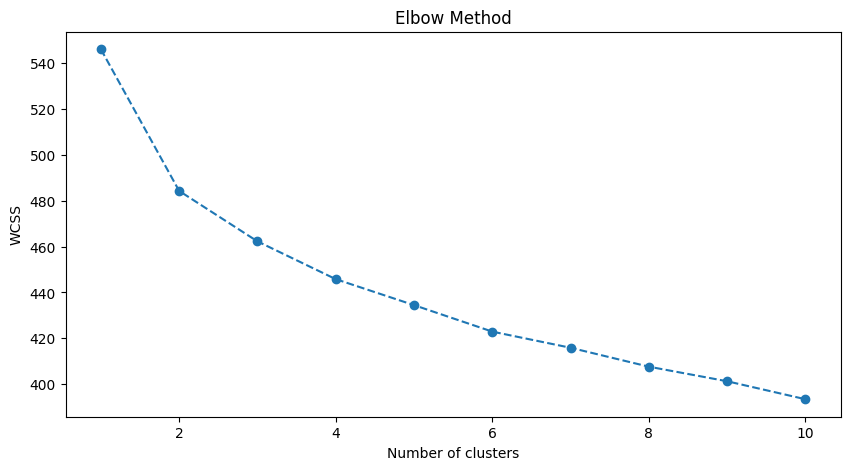

Enter the optimal number of clusters from the plot: 7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                             Ingredient  Cluster
0                     капуста китайская        1
1    мякоть задней ноги барана (окорок)        6
2                                  рыба        2
3                          зелень кинзы        2
4                                яблоко        5
..                                  ...      ...
413                                 мёд        4
414                      рыжики солёные        6
415                              брюква        3
416                             пшеница        2
417                        грибы свежие        6

[418 rows x 2 columns]


In [ ]:

import time
matrix = np.array(list(embeddings_dict.values()))
# Determine optimal clusters (in this example we're checking for up to 10 clusters)
determine_optimal_clusters(matrix, 10)

# Once you've determined the optimal number of clusters from the plot,
# set n_clusters to that value, and proceed with your original code
time.sleep(2)
n_clusters = int(input("Enter the optimal number of clusters from the plot: "))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)

# Assign cluster labels to ingredients
clusters = kmeans.labels_
ingredients = list(embeddings_dict.keys())

# Create a DataFrame for easier visualization
df_clusters = pd.DataFrame({
    'Ingredient': ingredients,
    'Cluster': clusters
})

print(df_clusters)

<ipython-input-2-6bef499625b4>:35: RuntimeWarning: Mean of empty slice.
  avg_x = xs.mean()
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
<ipython-input-2-6bef499625b4>:36: RuntimeWarning: Mean of empty slice.
  avg_y = ys.mean()


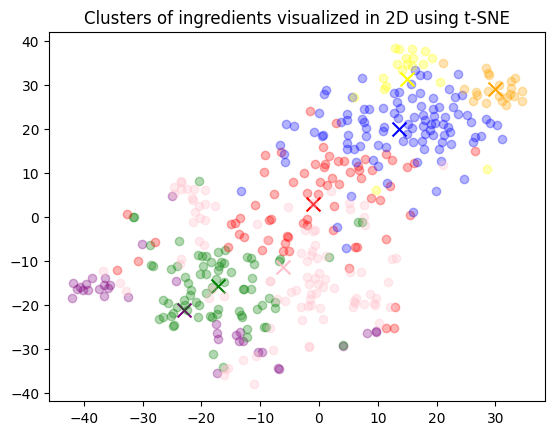

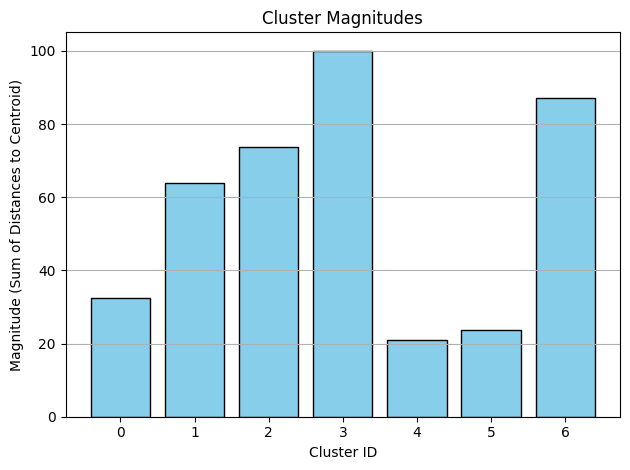

Cluster Cardinality:
Cluster
0     34
1     77
2     68
3    101
4     19
5     22
6     97
dtype: int64


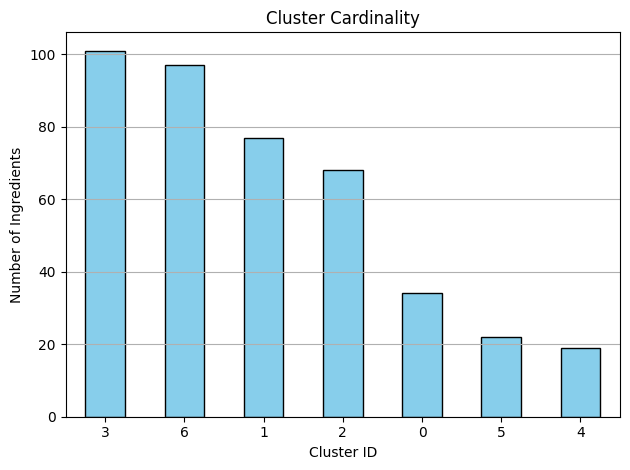

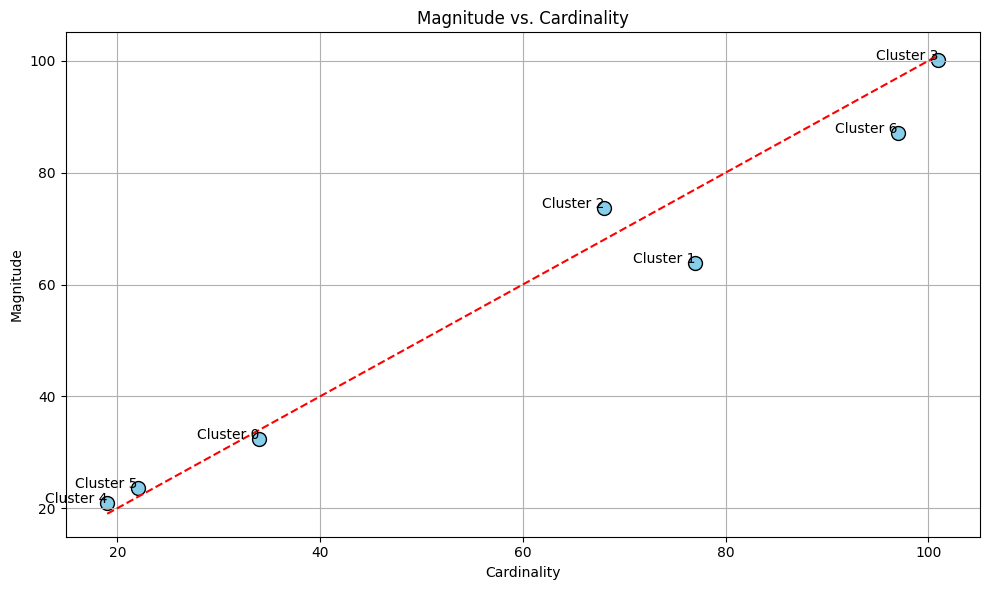

In [ ]:
# 이 코드는 바로 위꺼 후에 실행시켜야함
visualize_clusters(matrix, kmeans, df_clusters)

In [ ]:
plt.rcParams['font.family'] = 'DejaVu Sans'


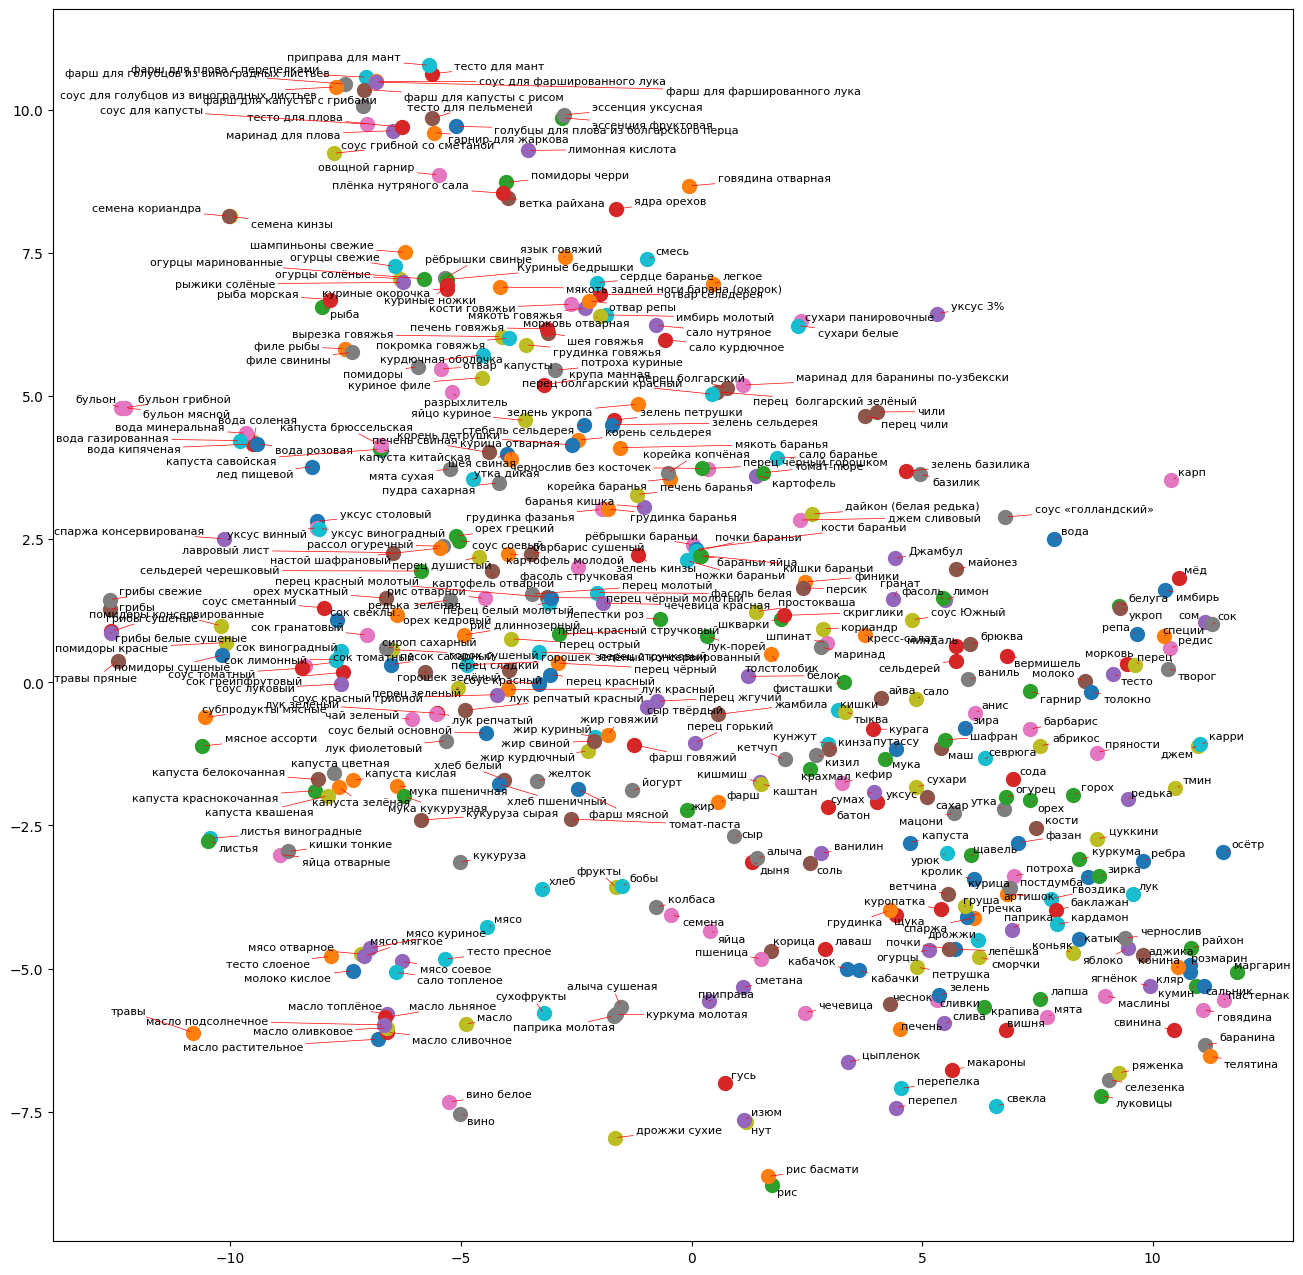

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from adjustText import adjust_text

import torch
# Using a list comprehension to gather all valid embeddings
embeddings_list = [embedding for embedding in embeddings_dict.values() if isinstance(embedding, (torch.Tensor, np.ndarray))]
# Convert all torch tensors to numpy arrays (if any)
#embeddings_array = np.vstack([embedding.numpy() if isinstance(embedding, torch.Tensor) else embedding for embedding in embeddings_list])
embeddings_array = np.vstack(list(embeddings_dict.values()))


labels = list(embeddings_dict.keys())
tsne_model = TSNE(perplexity=30, n_components=2, init="pca", n_iter=300, random_state=23)
new_values = tsne_model.fit_transform(embeddings_array)

plt.figure(figsize=(16, 16))
texts = []  # store labels here
for i in range(len(new_values)):
    plt.scatter(new_values[i][0], new_values[i][1], s = 100)
    texts.append(plt.text(new_values[i][0], new_values[i][1], labels[i], ha='center',fontsize = 8))

adjust_text(texts,
            expand_points=(1.5, 1.5),
            expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='red', lw=0.5))



plt.show()


FOODBERT - RUS

In [ ]:
import pickle
with open('/content/drive/MyDrive/MyEmbeddings/foodbert_RUS_embeddings.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

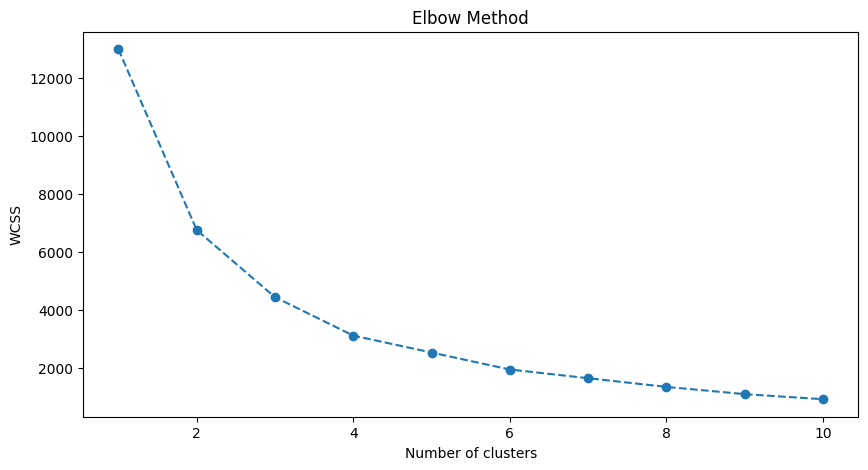

Enter the optimal number of clusters from the plot: 6


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                             Ingredient  Cluster
0                     капуста китайская        1
1    мякоть задней ноги барана (окорок)        4
2                                  рыба        5
3                          зелень кинзы        3
4                                яблоко        0
..                                  ...      ...
413                                 мёд        2
414                      рыжики солёные        1
415                              брюква        0
416                             пшеница        0
417                        грибы свежие        3

[418 rows x 2 columns]


In [ ]:

import time
matrix = np.array(list(embeddings_dict.values()))
# Determine optimal clusters (in this example we're checking for up to 10 clusters)
determine_optimal_clusters(matrix, 10)

# Once you've determined the optimal number of clusters from the plot,
# set n_clusters to that value, and proceed with your original code
time.sleep(2)
n_clusters = int(input("Enter the optimal number of clusters from the plot: "))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(matrix)

# Assign cluster labels to ingredients
clusters = kmeans.labels_
ingredients = list(embeddings_dict.keys())

# Create a DataFrame for easier visualization
df_clusters = pd.DataFrame({
    'Ingredient': ingredients,
    'Cluster': clusters
})

print(df_clusters)

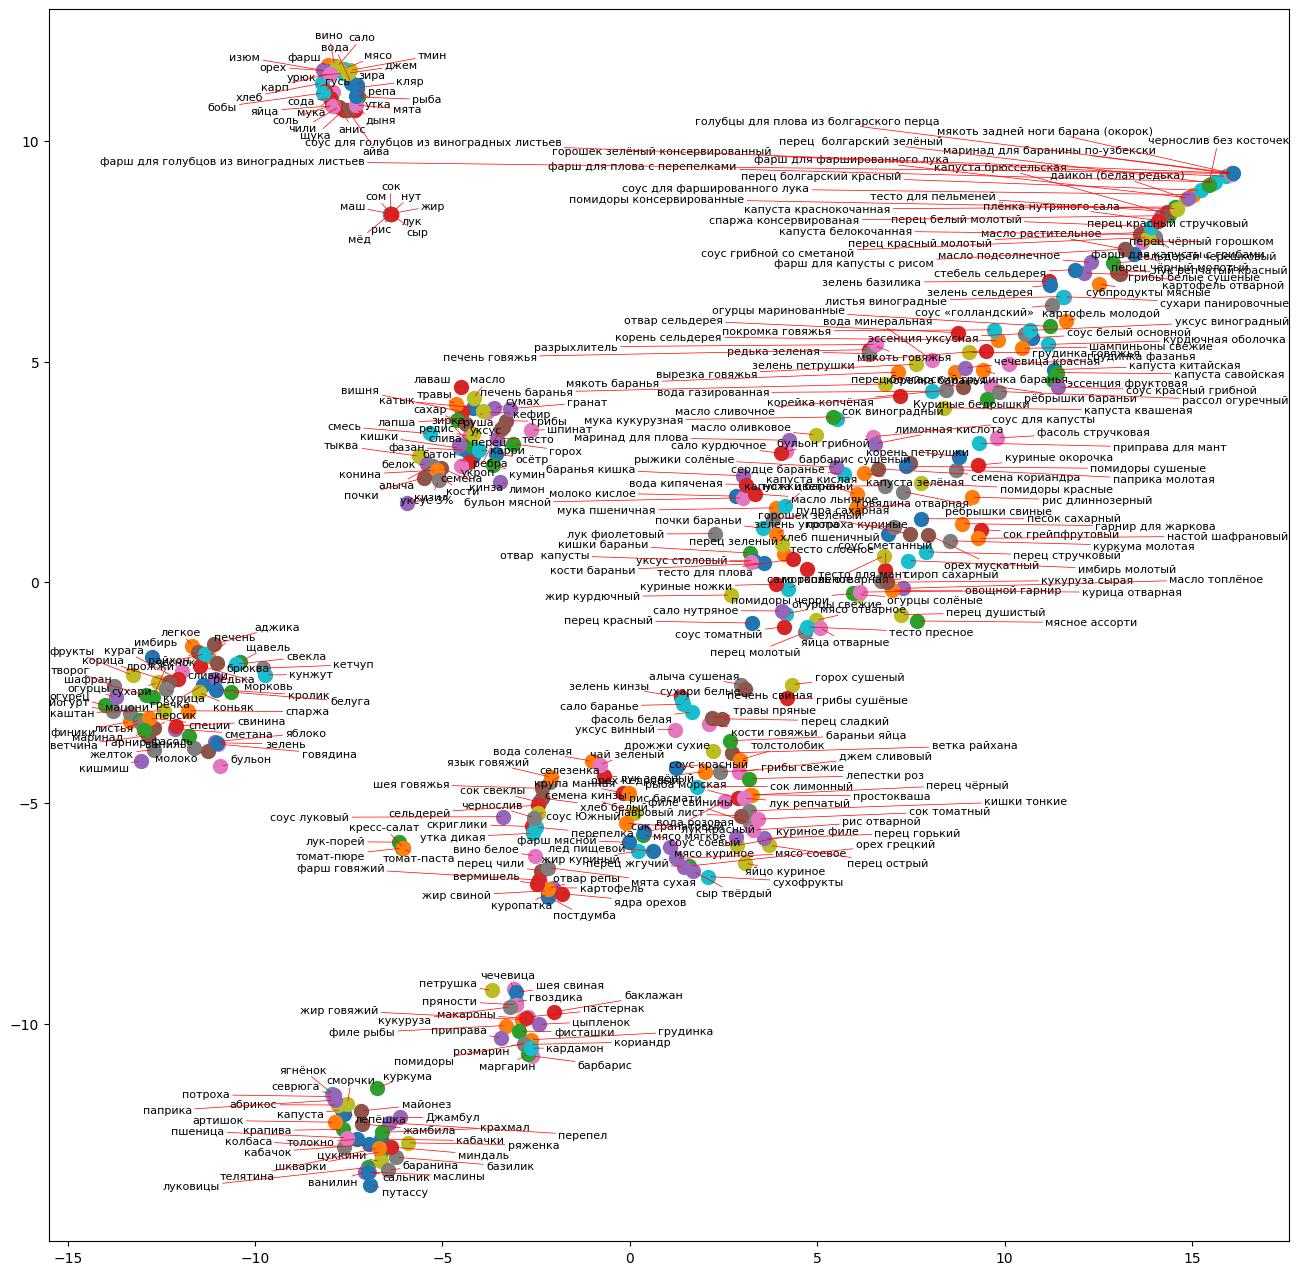

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from adjustText import adjust_text

import torch
# Using a list comprehension to gather all valid embeddings
embeddings_list = [embedding for embedding in embeddings_dict.values() if isinstance(embedding, (torch.Tensor, np.ndarray))]
# Convert all torch tensors to numpy arrays (if any)
#embeddings_array = np.vstack([embedding.numpy() if isinstance(embedding, torch.Tensor) else embedding for embedding in embeddings_list])
embeddings_array = np.vstack(list(embeddings_dict.values()))


labels = list(embeddings_dict.keys())
tsne_model = TSNE(perplexity=30, n_components=2, init="pca", n_iter=300, random_state=23)
new_values = tsne_model.fit_transform(embeddings_array)

plt.figure(figsize=(16, 16))
texts = []  # store labels here
for i in range(len(new_values)):
    plt.scatter(new_values[i][0], new_values[i][1], s = 100)
    texts.append(plt.text(new_values[i][0], new_values[i][1], labels[i], ha='center',fontsize = 8))

adjust_text(texts,
            expand_points=(1.5, 1.5),
            expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='red', lw=0.5))



plt.show()
